In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

In [2]:
# Load and preprocess data
def load_data():
    # Dummy function to load truss images and geographical data
    # Replace with actual data loading and preprocessing
    images = np.random.rand(1000, 64, 64, 1)  # Dummy truss images
    labels = np.random.randint(0, 10, 1000)  # Dummy labels for classification
    return images, labels


In [3]:
# Capsule Networks (CapsNets)
def create_capsnet_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(256, (9, 9), activation='relu', padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Reshape((-1, 8))(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, x)
    return model


In [4]:
# Graph Convolutional Networks (GNNs) Placeholder
def create_gnn_model(num_features, num_classes):
    return models.Sequential([
        layers.Input(shape=(num_features,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])


In [5]:
# Transformer Networks Placeholder
def create_transformer_model(input_shape, num_classes):
    return models.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])


In [6]:
# Autoencoders + MLP
def create_autoencoder_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Flatten()(inputs)
    x = layers.Dense(128, activation='relu')(x)
    encoded = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(encoded)
    decoded = layers.Dense(np.prod(input_shape), activation='sigmoid')(x)
    decoded = layers.Reshape(input_shape)(decoded)
    autoencoder = models.Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

def create_mlp_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Flatten()(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, x)
    return model


In [7]:
# Mixture of Experts (MoE)
def create_moe_model(input_shape, num_classes, num_experts=2):
    inputs = layers.Input(shape=input_shape)
    experts = [layers.Dense(64, activation='relu')(inputs) for _ in range(num_experts)]
    expert_outputs = [layers.Dense(num_classes)(expert) for expert in experts]

    # Create a gating network to weight the contributions of each expert
    gating_network = layers.Dense(num_experts, activation='softmax')(inputs)

    # Use the gating network to weight the expert outputs
def weighted_sum(expert_outputs, gating_network):
    # Expand dimensions for broadcasting
    gating_network_expanded = K.expand_dims(gating_network, axis=2)
    # Multiply the gating network with expert outputs and sum
    return K.sum(gating_network_expanded * tf.stack(expert_outputs, axis=1), axis=1)

    output = layers.Lambda(lambda x: weighted_sum(x[0], x[1]))([tf.stack(expert_outputs, axis=1), gating_network])
    model = models.Model(inputs, output)
    return model


In [8]:
# Train and evaluate models
def train_and_evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=2, validation_data=(x_val, y_val))
    y_pred = np.argmax(model.predict(x_test), axis=1)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return history, acc, cm


In [9]:
# Plotting functions
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def plot_training_curves(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')
    plt.show()


In [10]:
# Main
if __name__ == "__main__":
    # Load and preprocess data
    images, labels = load_data()
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Epoch 1/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.1171 - loss: 131.7609 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 98s 5s/step - accuracy: 0.1121 - loss: 2.3025 - val_accuracy: 0.0938 - val_loss: 2.3028
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
CapsNet Accuracy: 0.1


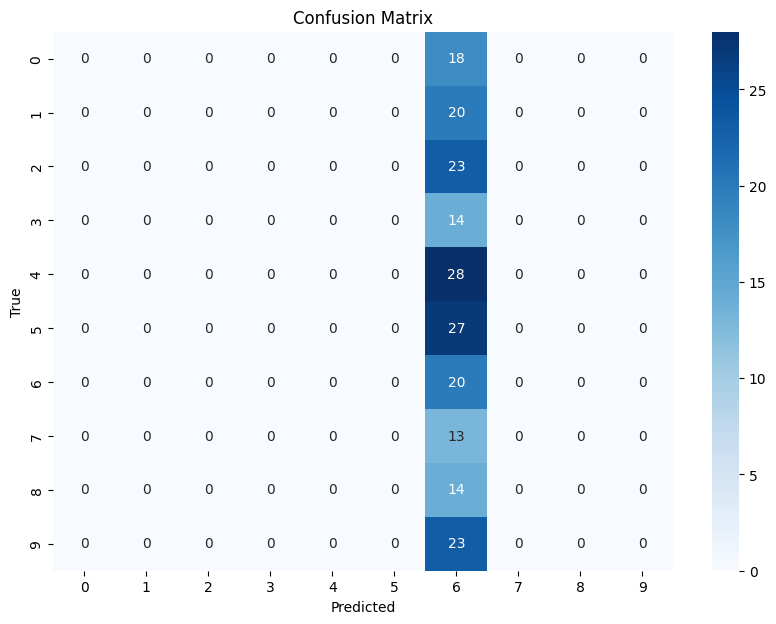

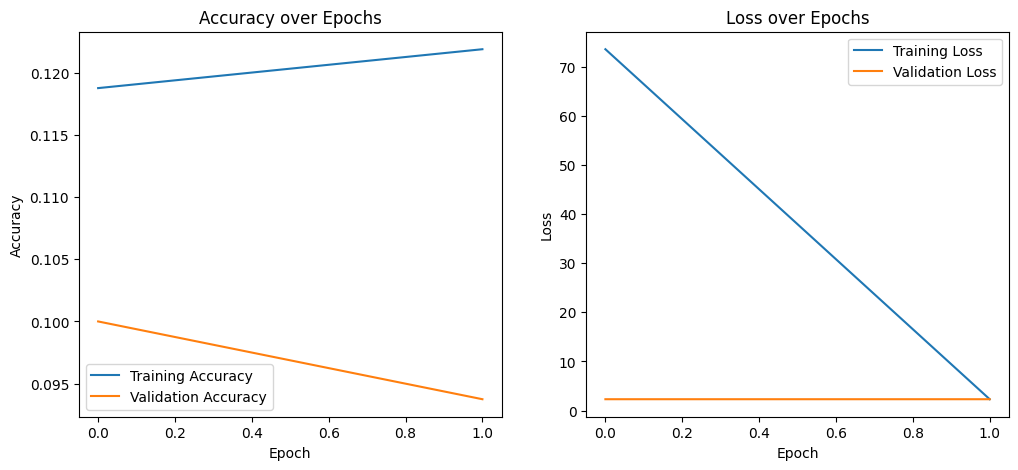

In [11]:
    # Capsule Networks
    capsnet_model = create_capsnet_model(input_shape=(64, 64, 1), num_classes=10)
    capsnet_history, capsnet_acc, capsnet_cm = train_and_evaluate_model(capsnet_model, x_train, y_train, x_val, y_val, x_test, y_test)
    print(f"CapsNet Accuracy: {capsnet_acc}")
    plot_confusion_matrix(capsnet_cm, labels=list(range(10)))
    plot_training_curves(capsnet_history)

Epoch 1/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1010 - loss: 2.6449 - val_accuracy: 0.1312 - val_loss: 2.3023
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1243 - loss: 2.3024 - val_accuracy: 0.1312 - val_loss: 2.3024
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
GNN Accuracy: 0.065


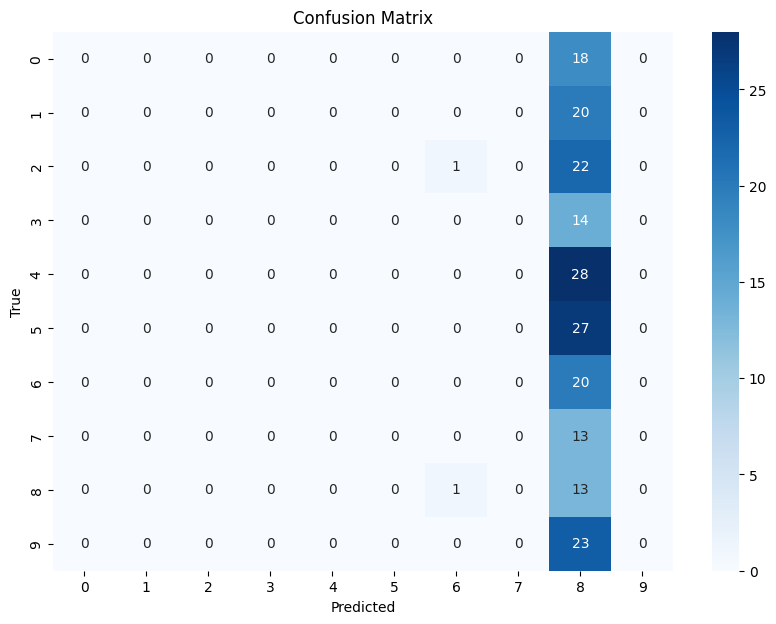

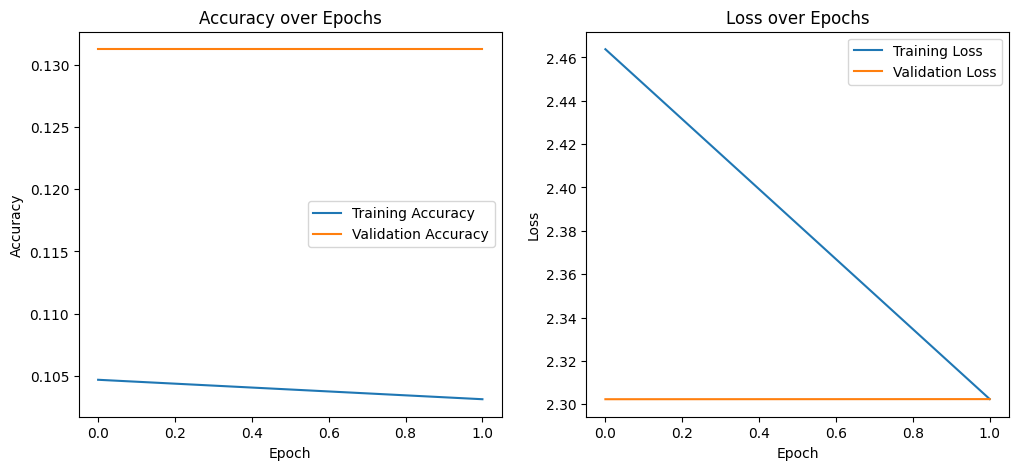

In [12]:
    # Graph Convolutional Networks (GNNs)
    gnn_model = create_gnn_model(num_features=64*64, num_classes=10)  # Flattened input features
    gnn_history, gnn_acc, gnn_cm = train_and_evaluate_model(gnn_model, x_train.reshape(len(x_train), -1), y_train, x_val.reshape(len(x_val), -1), y_val, x_test.reshape(len(x_test), -1), y_test)
    print(f"GNN Accuracy: {gnn_acc}")
    plot_confusion_matrix(gnn_cm, labels=list(range(10)))
    plot_training_curves(gnn_history)



Epoch 1/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1000 - loss: 2.9448 - val_accuracy: 0.1063 - val_loss: 2.3319
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1578 - loss: 2.2860 - val_accuracy: 0.1437 - val_loss: 2.3542


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Transformer Accuracy: 0.06


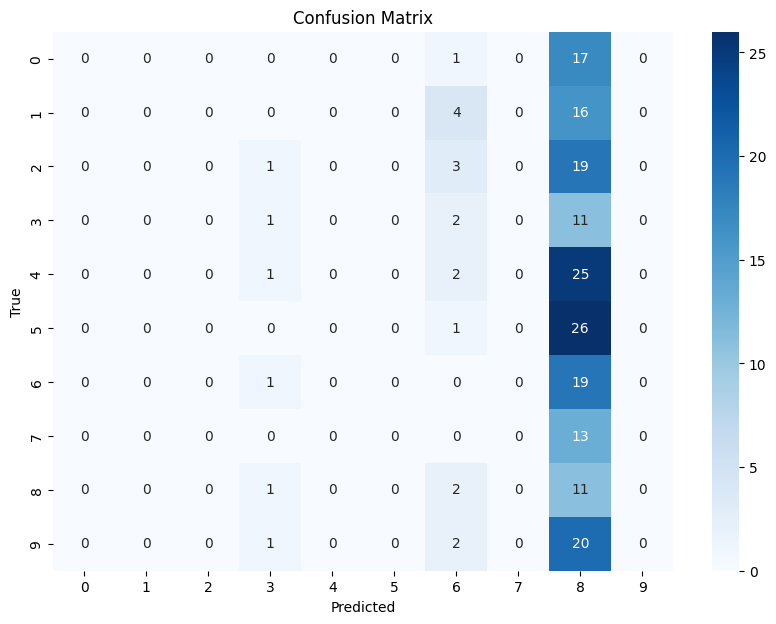

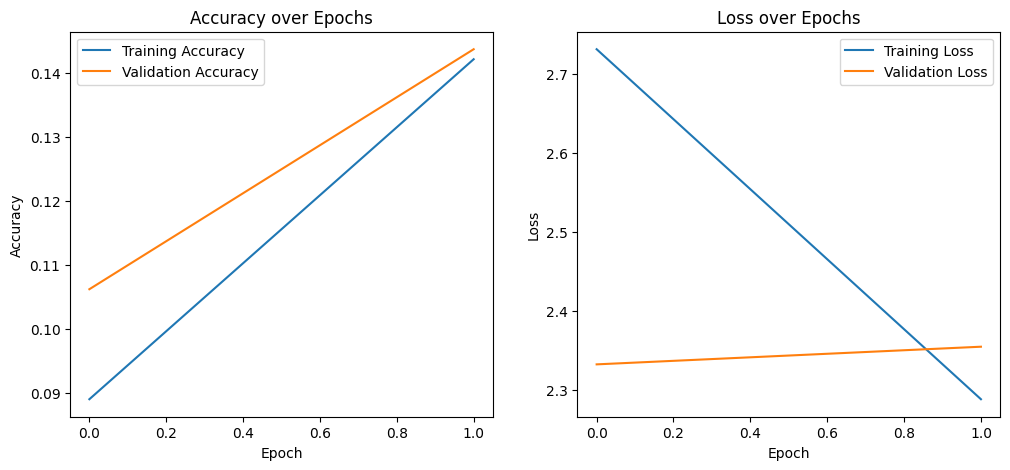

In [13]:
    # Transformer Networks
    transformer_model = create_transformer_model(input_shape=(64, 64, 1), num_classes=10)
    transformer_history, transformer_acc, transformer_cm = train_and_evaluate_model(transformer_model, x_train, y_train, x_val, y_val, x_test, y_test)
    print(f"Transformer Accuracy: {transformer_acc}")
    plot_confusion_matrix(transformer_cm, labels=list(range(10)))
    plot_training_curves(transformer_history)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.6931 - val_loss: 0.6932
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.6930 - val_loss: 0.6932
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.6930 - val_loss: 0.6932
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6929 - val_loss: 0.6932
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6929 - val_loss: 0.6933
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6928 - val_loss: 0.6932
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6928 - val_loss: 0.6932
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6928 - val_loss: 0.6932
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6927 - val_loss: 0.6933


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0902 - loss: 3.2064 - val_accuracy: 0.1250 - val_loss: 2.3108
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0896 - loss: 2.3165 - val_accuracy: 0.0938 - val_loss: 2.3027
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MLP Accuracy (after autoencoding): 0.1


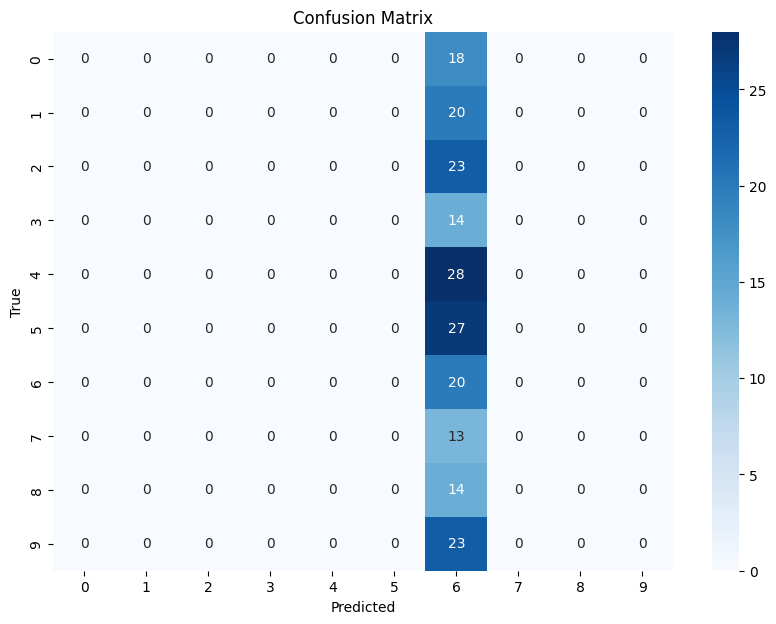

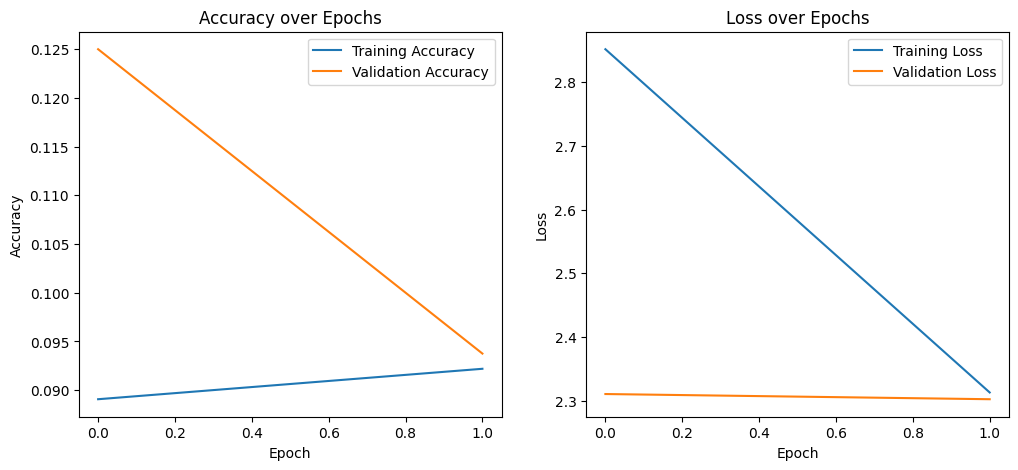

In [14]:
    # Autoencoders + MLP
    autoencoder_model = create_autoencoder_model(input_shape=(64, 64, 1))
    autoencoder_model.fit(x_train, x_train, epochs=10, validation_data=(x_val, x_val))  # Train autoencoder
    x_train_encoded = autoencoder_model.predict(x_train)
    x_val_encoded = autoencoder_model.predict(x_val)
    x_test_encoded = autoencoder_model.predict(x_test)
    mlp_model = create_mlp_model(input_shape=(64*64,), num_classes=10)  # Flattened input for MLP
    mlp_history, mlp_acc, mlp_cm = train_and_evaluate_model(mlp_model, x_train_encoded.reshape(len(x_train_encoded), -1), y_train, x_val_encoded.reshape(len(x_val_encoded), -1), y_val, x_test_encoded.reshape(len(x_test_encoded), -1), y_test)
    print(f"MLP Accuracy (after autoencoding): {mlp_acc}")
    plot_confusion_matrix(mlp_cm, labels=list(range(10)))
    plot_training_curves(mlp_history)
